Import Necessary Libraries. Here I will be using Keras library for making classifier. We will also requires numpy and Image for making image to array implementation. We will be using sequential model here in the notebook. 

In [1]:
#Importing Necessary Libraries.
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [2]:
import os
print(os.listdir("../input"))

['cell_images']


# Data Preperation

* Data Preperation: We will create two list image_arr and labels. image_arr will hold all images in array format while labels will contain their corresponding labels (0,1).*

**Note:** Infected images belongs to class 1, and uninfected images belongs to class 0

In [3]:
image_arr = []
labels = []

infected = os.listdir("../input/cell_images/cell_images/Parasitized/")
uninfected = os.listdir("../input/cell_images/cell_images/Uninfected/")

for img in infected:
    try:
        image = cv2.imread("../input/cell_images/cell_images/Parasitized/" + img)
        image_from_array = Image.fromarray(image, 'RGB')  #Read in the image with PIL image function in colour mode.
        resize_img = image_from_array.resize((100, 100))  #Resize the image to 60 * 60
        image_arr.append(np.array(resize_img))
        labels.append(1)
        
    except AttributeError:
        print("An error occured while reading in the image")

for img in uninfected:
    try:
        image=cv2.imread("../input/cell_images/cell_images/Uninfected/" + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((100, 100))
        image_arr.append(np.array(resize_img))
        labels.append(0)
        
    except AttributeError:
        print("An error occur while reading the image")
    

An error occured while reading in the image
An error occur while reading the image


In [4]:
print(len(image_arr))
print(len(labels))

27558
27558


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sample of uninfected malaria cell')

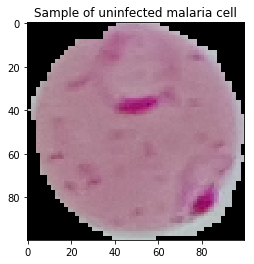

In [6]:
plt.imshow(image_arr[0])
plt.title("Sample of uninfected malaria cell")

Saving the processed images as numpy file

Text(0.5, 1.0, 'Sample of infected malaria cell')

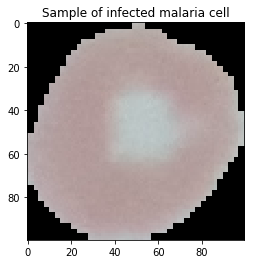

In [7]:
plt.imshow(image_arr[-1])
plt.title("Sample of infected malaria cell")

In [8]:
train_data = np.array(image_arr)
train_labels = np.array(labels)
idx = np.arange(train_data.shape[0])
np.random.shuffle(idx)
train_data = train_data[idx]
train_labels = train_labels[idx]


In [9]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img


Xtrain, Xval, ytrain, yval = train_test_split(train_data,train_labels, test_size=0.02)

batch_size = 64
ntrain = len(Xtrain)
nval = len(Xval)

In [10]:
print(f'Shape of training image : {Xtrain.shape}')
print(f'Shape of validation image : {Xval.shape}')
print(f'Shape of training labels : {ytrain.shape}')
print(f'Shape of validation labels : {yval.shape}')

Shape of training image : (27006, 100, 100, 3)
Shape of validation image : (552, 100, 100, 3)
Shape of training labels : (27006,)
Shape of validation labels : (552,)


In [11]:
#Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(Xtrain, ytrain, batch_size=batch_size, shuffle=False)
val_generator = train_datagen.flow(Xval, yval, batch_size=16, shuffle=False)

 # Create Keras Model

In [12]:
#let's build the CNN model
from keras import optimizers
cnn = Sequential()


cnn.add(Conv2D(512, (3, 3), activation="relu", padding = 'same',input_shape=(100, 100, 3)))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(254, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(128, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", padding = 'same'))
cnn.add(Conv2D(32, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(24, (3, 3), activation="relu", padding = 'same'))
cnn.add(Conv2D(16, (3, 3), activation="relu", padding = 'same'))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 512))
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

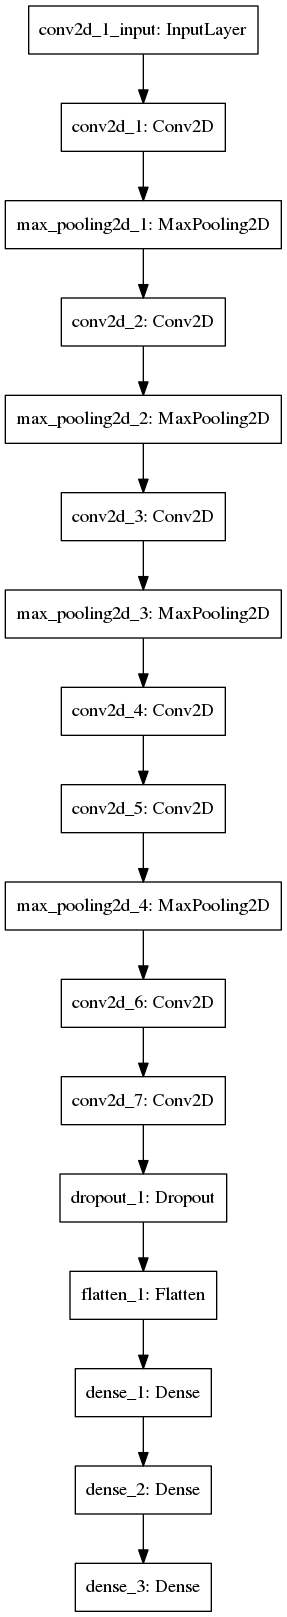

In [13]:
from keras.utils import plot_model
plot_model(cnn, to_file='model.png')

In [14]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
#Fit the model with min batch size as 50[can tune batch size to some factor of 2^power ] 
cnn.fit_generator(train_generator,steps_per_epoch=ntrain//batch_size,epochs=20,
                             validation_data=val_generator, validation_steps=nval//batch_size)

Epoch 1/20
421/421 [==============================] - 57s 134ms/step - loss: 0.2793 - accuracy: 0.8609 - val_loss: 0.1054 - val_accuracy: 0.9844
Epoch 2/20
421/421 [==============================] - 51s 121ms/step - loss: 0.1400 - accuracy: 0.9582 - val_loss: 0.1771 - val_accuracy: 0.9531
Epoch 3/20
421/421 [==============================] - 51s 121ms/step - loss: 0.1352 - accuracy: 0.9579 - val_loss: 0.2908 - val_accuracy: 0.9141
Epoch 4/20
421/421 [==============================] - 51s 121ms/step - loss: 0.1260 - accuracy: 0.9605 - val_loss: 0.2152 - val_accuracy: 0.9609
Epoch 5/20
421/421 [==============================] - 51s 121ms/step - loss: 0.1227 - accuracy: 0.9608 - val_loss: 0.1288 - val_accuracy: 0.9833
Epoch 6/20
421/421 [==============================] - 51s 121ms/step - loss: 0.1163 - accuracy: 0.9604 - val_loss: 0.0989 - val_accuracy: 0.9844
Epoch 7/20
421/421 [==============================] - 51s 121ms/step - loss: 0.1111 - accuracy: 0.9621 - val_loss: 0.5017 - val_ac

In [16]:
# #load model and make predictions
# from keras.models import load_model
# cnn = load_model('../input/pneumonnia-prediction-dsn/pneumonia_model_best.h5')

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# predict probabilities for test set
# yhat_probs = cnn.predict(Xval, verbose=0)
# predict crisp classes for test set
yhat_classes = cnn.predict_classes(Xval, verbose=0)
# reduce to 1d array
# yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yval, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yval, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yval, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yval, yhat_classes)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(yval, yhat_classes)
print(matrix)

#classiication report
cp = classification_report(yval, yhat_classes)
print(cp)

Accuracy: 0.748188
Precision: 0.660759
Recall: 0.981203
F1 score: 0.789713
[[152 134]
 [  5 261]]
              precision    recall  f1-score   support

           0       0.97      0.53      0.69       286
           1       0.66      0.98      0.79       266

    accuracy                           0.75       552
   macro avg       0.81      0.76      0.74       552
weighted avg       0.82      0.75      0.74       552



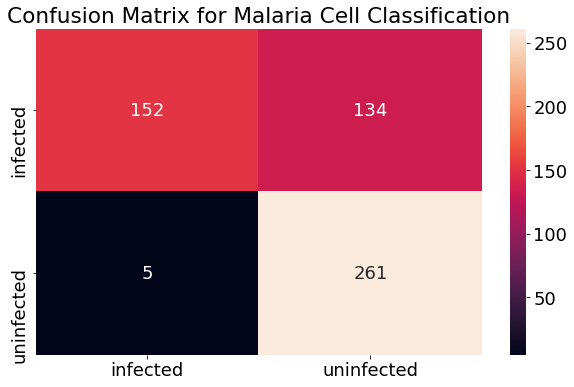

In [18]:
import seaborn as sb
import pandas as pd

columns = ['infected','uninfected']  

cp_df = pd.DataFrame(matrix,columns,columns)                      
plt.figure(figsize=(10,6))  
plt.rcParams.update({'font.size': 18})
plt.title("Confusion Matrix for Malaria Cell Classification")
sb.heatmap(cp_df, annot=True, fmt='g')

In [19]:
#Fit the model with min batch size as 50[can tune batch size to some factor of 2^power ] 
history = cnn.history.history

# Plot of loss and validation accuracy

In [20]:
print(history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


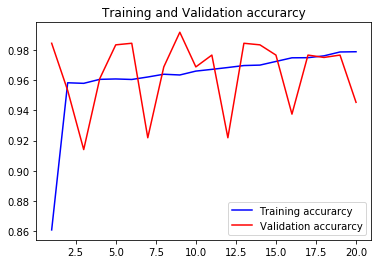

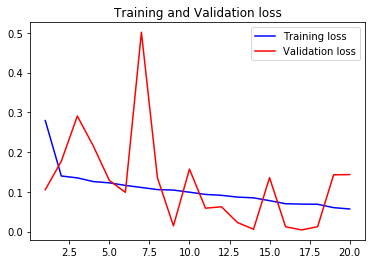

In [21]:
#lets plot the train and val curve
#get the details form the history object
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)
plt.rcParams.update({'font.size': 10})
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [22]:
from keras.models import load_model
cnn.save('malaria_model.h5')
# model.save_weights('malaria_model_wieghts.h5')

# Use of Model

In [23]:
# from keras.models import load_model
# from PIL import Image
# from PIL import Image
# import numpy as np
# import os
# import cv2
# def convert_to_array(img):
#     im = cv2.imread(img)
#     img_ = Image.fromarray(im, 'RGB')
#     image = img_.resize((50, 50))
#     return np.array(image)
# def get_cell_name(label):
#     if label==0:
#         return "Paracitized"
#     if label==1:
#         return "Uninfected"
# def predict_cell(file):
#     model = load_model('cells.h5')
#     print("Predicting Type of Cell Image.................................")
#     ar=convert_to_array(file)
#     ar=ar/255
#     label=1
#     a=[]
#     a.append(ar)
#     a=np.array(a)
#     score=model.predict(a,verbose=1)
#     print(score)
#     label_index=np.argmax(score)
#     print(label_index)
#     acc=np.max(score)
#     Cell=get_cell_name(label_index)
#     return Cell,"The predicted Cell is a "+Cell+" with accuracy =    "+str(acc)

